In [18]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
shp_path = "cb_2018_48_tract_500k.shp"
sf = shp.Reader(shp_path)
fields = [x[0] for x in sf.fields][1:]
records = sf.records()
shps = [s.points for s in sf.shapes()]
df = pd.DataFrame(columns=fields, data=records)
df = df.assign(coords=shps)

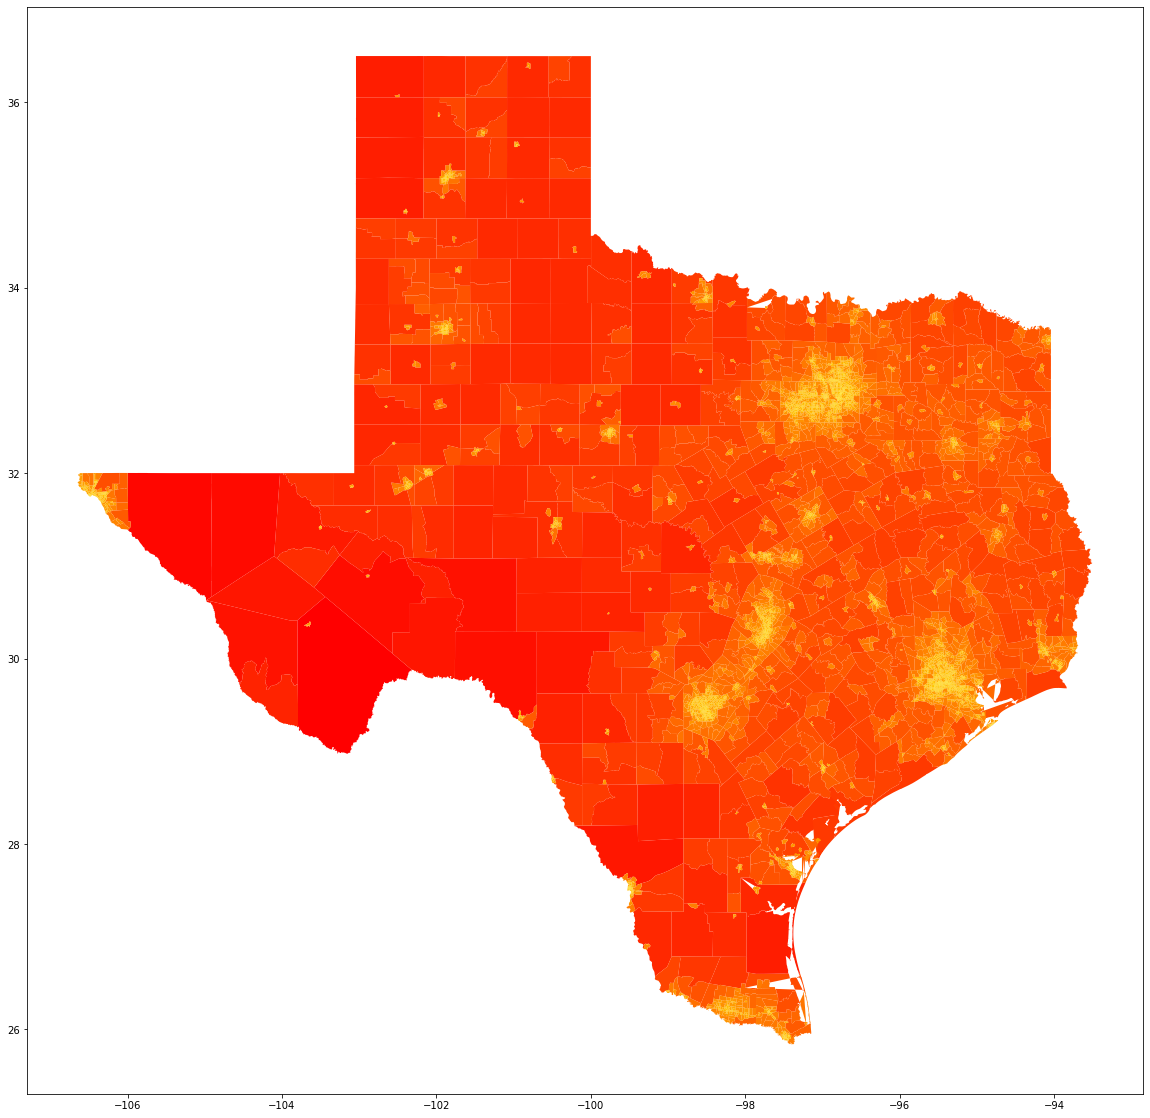

In [17]:
from matplotlib.colors import to_hex

cmap = plt.cm.autumn_r

poly_area = lambda x, y: 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
normalize = lambda l: (np.array(l)-min(l))/(max(l)-min(l))

areas = normalize([np.log(poly_area(*np.transpose(coord))) for coord in df['coords']])

plt.figure(figsize=(20, 20))
for c, coord in zip(areas, df['coords']):
    plt.fill(*np.transpose(coord), to_hex(cmap(c)), edgecolor=None, linewidth=0)